# Временные ряды

> Временной ряд – это последовательность значений, описывающих протекающий во времени процесс, измеренных в последовательные моменты времени, обычно через равные промежутки

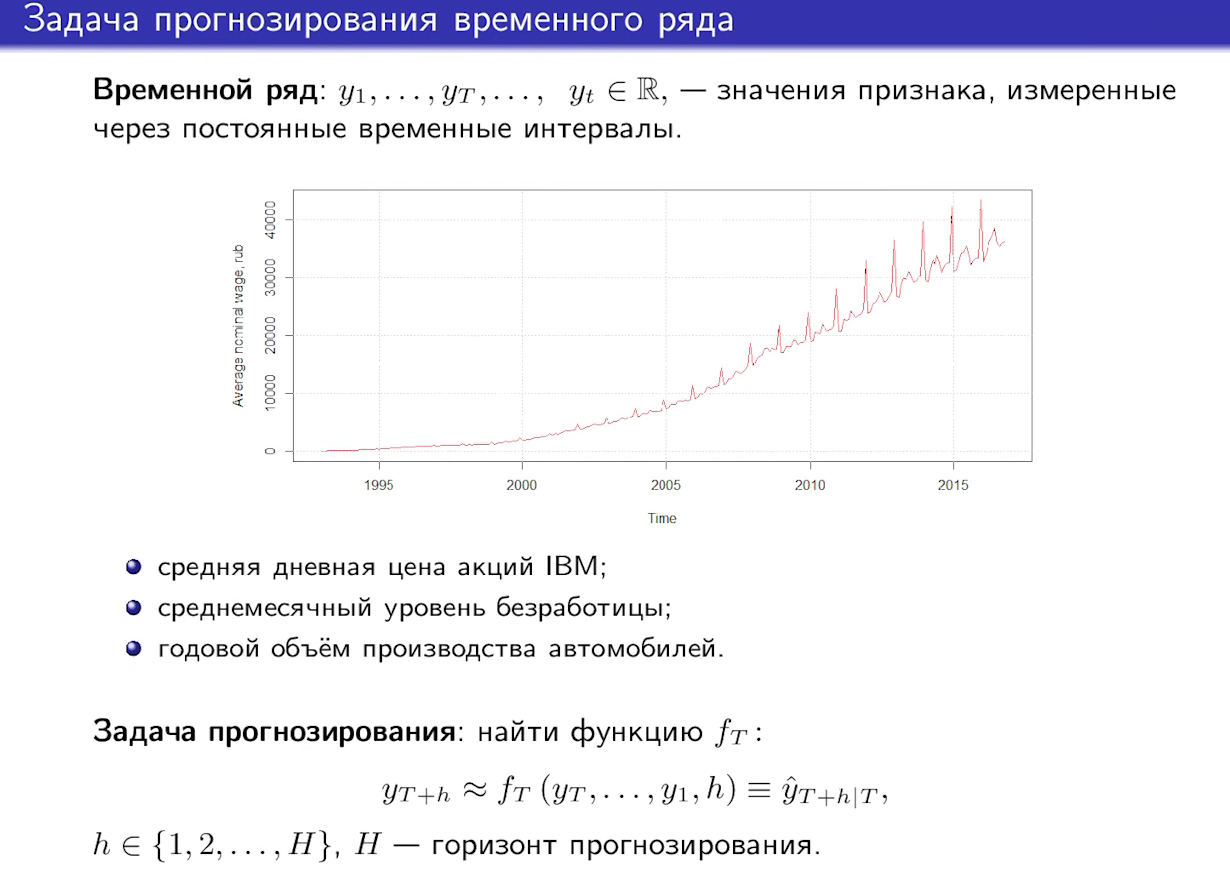

In [110]:
Image('images/tsintro.png', width=500)

In [2]:
from setup_libs import *

In [ ]:
data = pd.read_csv('data_/CERN.us.txt').drop(columns=['OpenInt'])
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

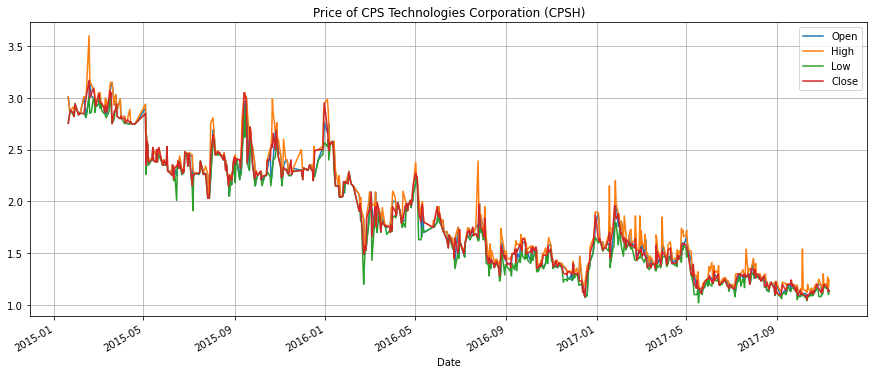

In [19]:
data[['Open', 'High', 'Low', 'Close']].plot(figsize=(15, 6), 
                                            title='Price of CPS Technologies Corporation (CPSH)')
plt.grid()

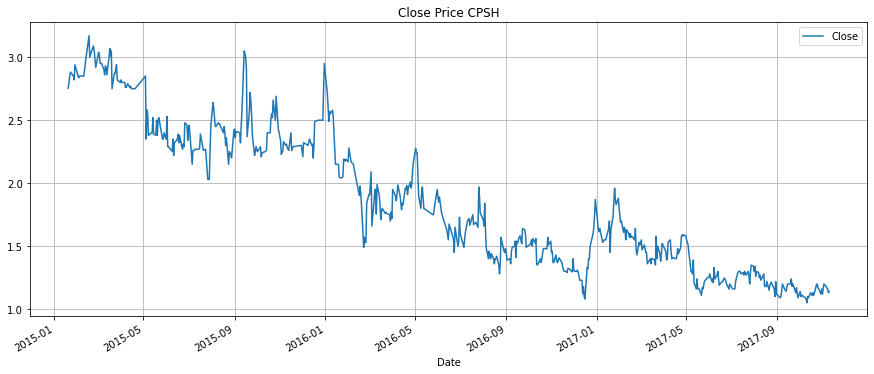

In [20]:
data[['Close']].plot(figsize=(15, 6), title='Close Price CPSH')
plt.grid()

## Daily return
Сколько заработаем, если вчера вечером купили, а сегодня вечером продадим.

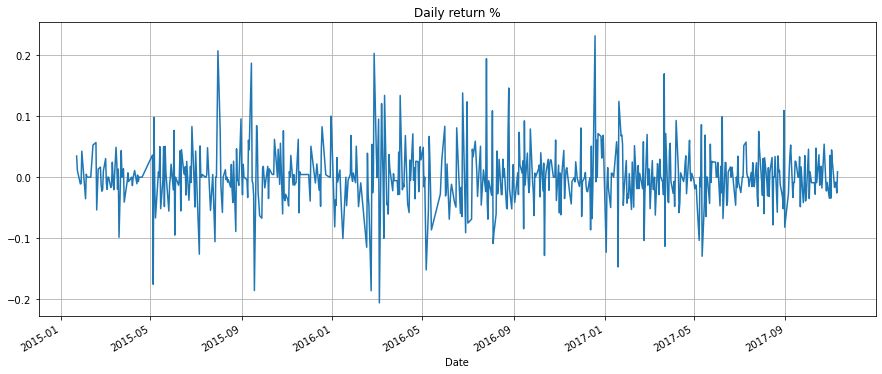

In [45]:
data['Daily return'] = data['Close'].pct_change()
data['Daily return'].plot(figsize=((15,6)), title='Daily return %')
plt.grid()

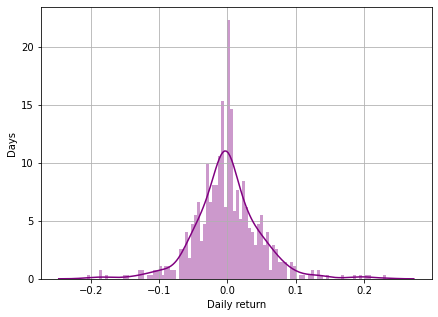

In [52]:
plt.figure(figsize=(7,5))
sns.distplot(data['Daily return'].dropna(), bins=100, color='purple')
plt.ylabel('Days')
plt.grid()

## Постановка задачи

Пусть данные $(X, y)$, где $X$ - это дата, а $y$ - некоторое значение параметра. 

Необходимо делать предсказание $y$ на будущее.

Основные отличия:

* Объекты **ЗАВИСИМЫ** в отличие от регресии/классификации/кластеризации.

* Возможно есть какие-то доп. пирзнаки для каждой даты, но обычно только дата.

## Варианты решений

### 1. Moving average (MA)

Скользящее среднее с окном длины $n$

$$\hat{y}_{t+1} = \frac{1}{n}\sum_{i=1}^{n}y_{t-i}$$

In [58]:
ma_day = [10, 50]

for ma in ma_day:
    column_name = f"Close MA {ma}"
    data[column_name] = data['Close'].rolling(ma).mean()


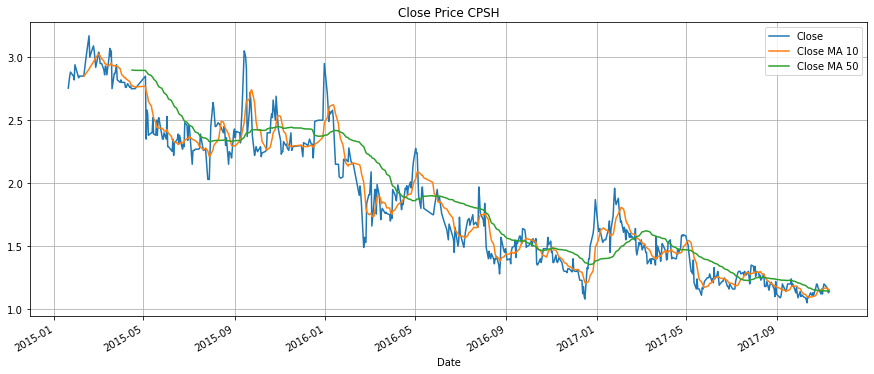

In [59]:
data[['Close', 'Close MA 10', 'Close MA 50']].plot(figsize=(15, 6), 
                                            title='Close Price CPSH',)

plt.grid()

### 2. Exponential average

А теперь посмотрим, что произойдёт, если вместо взвешивания последних $n$ значений ряда мы начнем взвешивать все доступные наблюдения, при этом экспоненциально уменьшая веса по мере углубления в исторические данные. В этом нам поможет формула простого [экспоненциального сглаживания](http://www.machinelearning.ru/wiki/index.php?title=Экспоненциальное_сглаживание):

$$\hat{y}_{t+1} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t} $$

Здесь модельное значение представляет собой средневзвешенную между текущим истинным и предыдущим модельным значениями. Вес $\alpha$ называется сглаживающим фактором. Он определяет, как быстро мы будем "забывать" последнее доступное истинное наблюдение. Чем меньше $\alpha$, тем больше влияния оказывают предыдущие модельные значения, и тем сильнее сглаживается ряд. 

Экспоненциальность скрывается в рекурсивности функции - каждый раз мы умножаем $(1-\alpha)$ на предыдущее модельное значение, которое, в свою очередь, также содержало в себе $(1-\alpha)$, и так до самого начала.

In [22]:
def exponential_smoothing(series, alpha):
    result = [series[0]]  # first value is same as series
    for i in range(len(series) - 1):
        result.append(alpha * series[i] + (1 - alpha) * result[i])
    return result

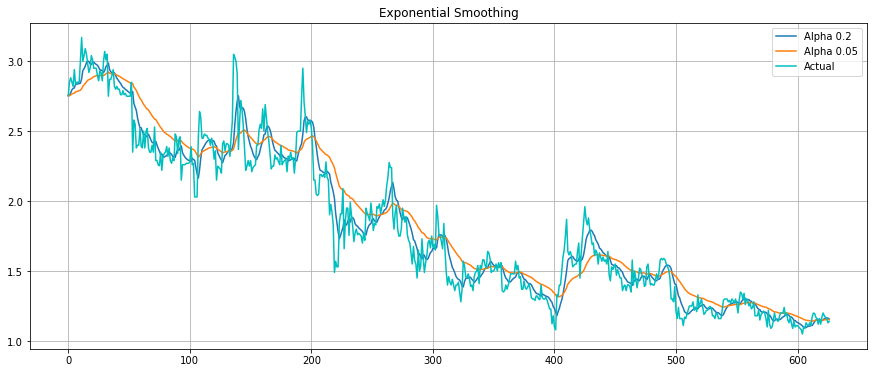

In [23]:
plt.figure(figsize=(15, 6))
for alpha in [0.2, 0.05]:
    plt.plot(
        exponential_smoothing(data.Close, alpha), label="Alpha {}".format(alpha)
    )
plt.plot(data.Close.values, "c", label="Actual")
plt.legend(loc="best")
plt.axis("tight")
plt.title("Exponential Smoothing")
plt.grid(True)

In [24]:
Q = np.sum((data.Close - exponential_smoothing(data.Close, alpha))**2)
print(Q)

17.775075700941517


## 3. Cтационарные ряды. Преобразование рядов.

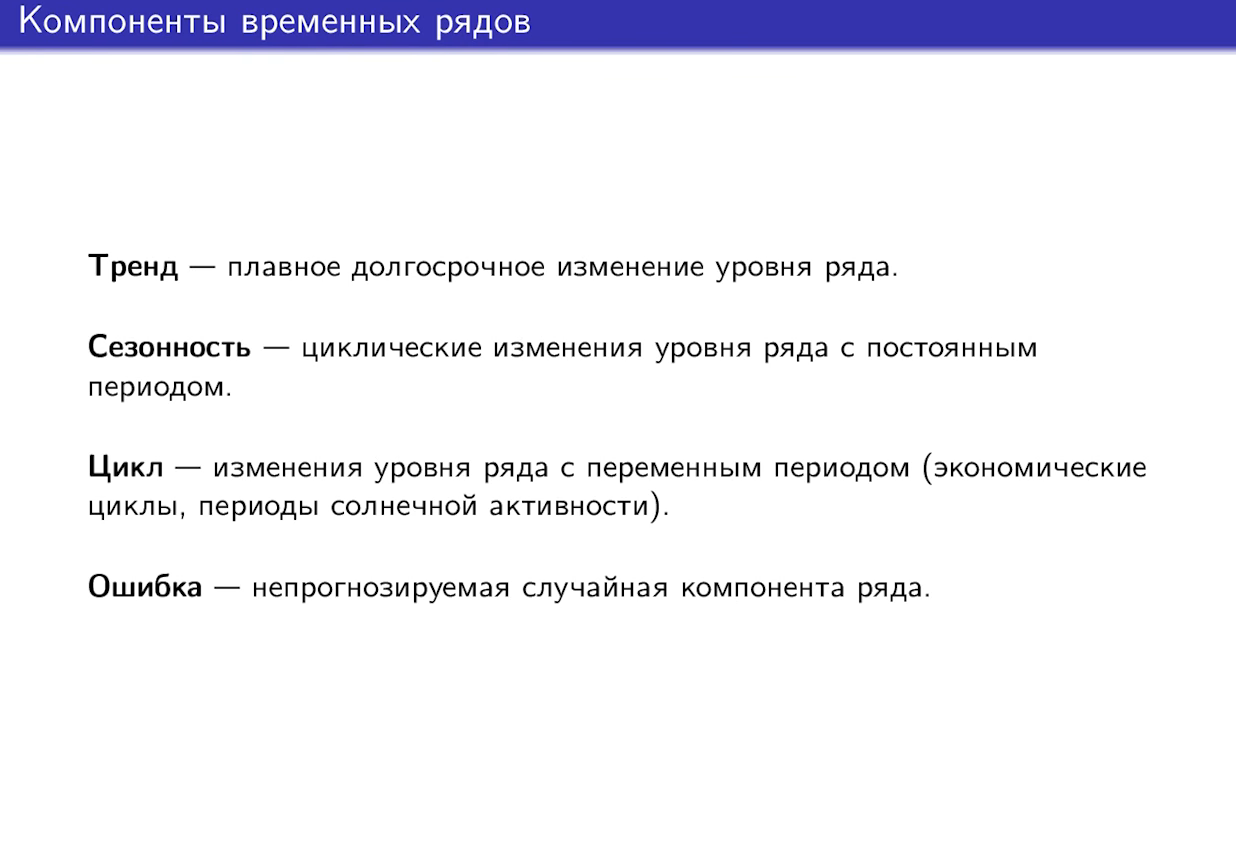

In [111]:
Image('images/components.png', width=500)

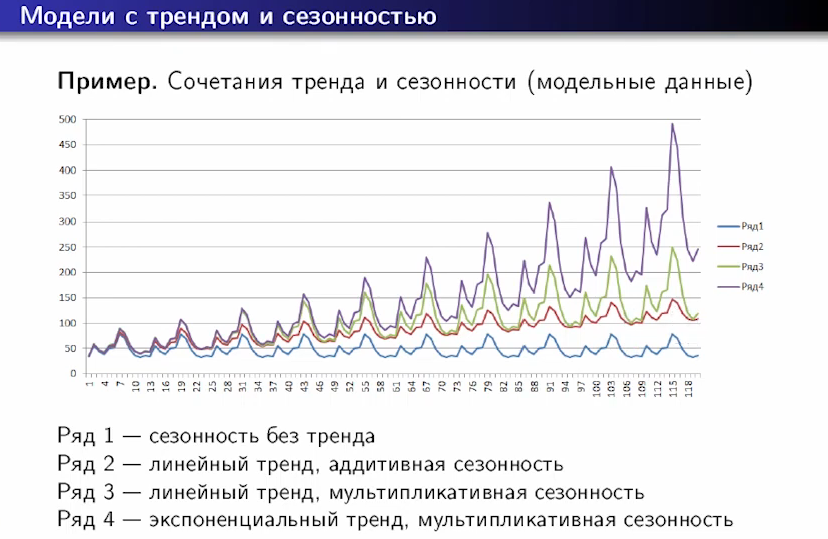

In [113]:
Image('images/seasons.png', width=500)

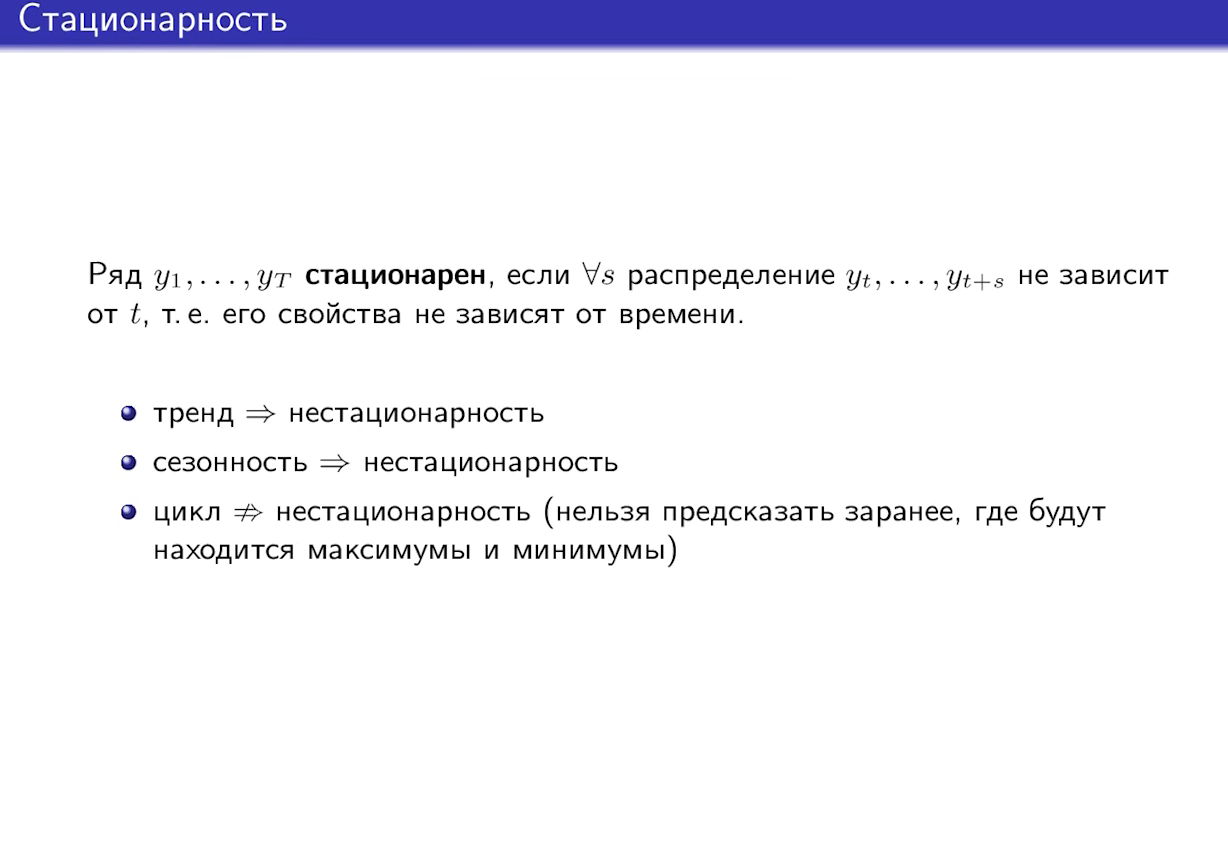

In [114]:
Image('images/stationar.png', width=500)

- Временной ряд справа не является стационарным, так как его матожидание со временем растёт

<img src="https://habrastorage.org/files/20c/9d8/a63/20c9d8a633ec436f91dccd4aedcc6940.png"/>

- Здесь не повезло с дисперсией - разброс значений ряда существенно варьируется в зависимости от периода

<img src="https://habrastorage.org/files/b88/eec/a67/b88eeca676d642449cab135273fd5a95.png"/>

- Наконец, на последнем графике видно, что значения ряда внезапно становятся ближе друг ко другу, образуя некоторый кластер, а в результате получаем непостоянство ковариаций

<img src="https://habrastorage.org/files/2f6/1ee/cb2/2f61eecb20714352840748b826e38680.png"/>

# Ссылки

* [Воронцов о временных рядах](https://www.youtube.com/watch?v=Rmh6b96u6UU&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=8)
* [(Must watch) Лекция по временным рядам Рябенко](https://www.youtube.com/watch?v=u433nrxdf5k)
* [Arima Хабр](https://habr.com/en/post/207160/)
* [Stocks predicting](https://www.kaggle.com/mgijon/basic-forecasting-time-series-based-methods)
* [Stock predict Amazon](https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm)
* [Stock feature engineering](https://www.kaggle.com/kratisaxena/stock-market-technical-indicators-visualization)